## Import necessary libraries

In [20]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Extract features (mfcc, chroma, mel) from a sound file

In [21]:

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

## Emotions in the RAVDESS dataset

In [23]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

## Load the data and extract features for each sound file

In [54]:

def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("//home//sakib//EmotionRecog//DATA//Actor_*//*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

## Split the dataset

In [ ]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

/tmp/ipykernel_4787/3312442463.py:15: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -1.5258789e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


[array([-6.66761841e+02,  7.90703201e+01,  9.97878170e+00,  2.23466568e+01,
        1.21350088e+01,  4.85466957e+00, -7.99741268e+00,  2.45991230e+00,
        1.82035649e+00,  9.23905969e-01,  2.42280865e+00,  7.86191607e+00,
       -2.73249793e+00,  4.12002993e+00,  2.11457634e+00, -2.67265111e-01,
        4.08437395e+00,  1.38240069e-01, -1.58503819e+00,  1.62598097e+00,
       -1.30634582e+00, -1.63895637e-01, -5.61414123e-01,  6.26430702e+00,
        1.83221173e+00,  2.16145682e+00, -8.04534078e-01,  7.80783832e-01,
        2.10783213e-01,  2.99311590e+00,  6.32907569e-01,  1.31445718e+00,
       -3.07898402e+00, -1.39163122e-01,  2.82908231e-01,  1.16018248e+00,
       -1.09771883e+00, -1.62363458e+00, -5.24756797e-02,  1.32033086e+00,
        6.93610430e-01,  6.85017943e-01,  6.31618619e-01,  6.67239547e-01,
        6.95460379e-01,  7.14036644e-01,  6.96256399e-01,  7.20292151e-01,
        6.93862438e-01,  7.40324140e-01,  8.28104794e-01,  7.74887264e-01,
        8.75060796e-04, 

/tmp/ipykernel_4787/3312442463.py:15: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


[array([-6.66761841e+02,  7.90703201e+01,  9.97878170e+00,  2.23466568e+01,
        1.21350088e+01,  4.85466957e+00, -7.99741268e+00,  2.45991230e+00,
        1.82035649e+00,  9.23905969e-01,  2.42280865e+00,  7.86191607e+00,
       -2.73249793e+00,  4.12002993e+00,  2.11457634e+00, -2.67265111e-01,
        4.08437395e+00,  1.38240069e-01, -1.58503819e+00,  1.62598097e+00,
       -1.30634582e+00, -1.63895637e-01, -5.61414123e-01,  6.26430702e+00,
        1.83221173e+00,  2.16145682e+00, -8.04534078e-01,  7.80783832e-01,
        2.10783213e-01,  2.99311590e+00,  6.32907569e-01,  1.31445718e+00,
       -3.07898402e+00, -1.39163122e-01,  2.82908231e-01,  1.16018248e+00,
       -1.09771883e+00, -1.62363458e+00, -5.24756797e-02,  1.32033086e+00,
        6.93610430e-01,  6.85017943e-01,  6.31618619e-01,  6.67239547e-01,
        6.95460379e-01,  7.14036644e-01,  6.96256399e-01,  7.20292151e-01,
        6.93862438e-01,  7.40324140e-01,  8.28104794e-01,  7.74887264e-01,
        8.75060796e-04, 

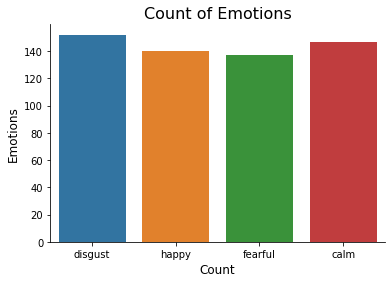

In [51]:
import matplotlib.pyplot as mplt
import seaborn as sbn

mplt.title("Count of Emotions", size=16)
sbn.countplot(x=y_train)
mplt.xlabel('Count',size = 12)
mplt.ylabel('Emotions',size = 12)
sbn.despine(top=True,right=True,left=False,bottom=False)

In [53]:
def createwaveplt(data,sr,e):
    mplt.figure(figsize=(10,3))
    mplt.title('Waveplot for audio with () emotion'.format(e), size=15)
    librosa.display_waveplot(data,sr=sr)
    mplt.show()

## DATASET Dimensions

In [6]:
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


## Get the number of features extracted

In [16]:

print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


## Initialize the Multi Layer Perceptron Classifier

In [17]:

model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

## Train the model

In [9]:

model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

## Predict for the test set

In [ ]:

y_pred=model.predict(x_test)

## Calculate the accuracy of our model

In [11]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 65.62%


In [32]:
x_train[0]

array([-4.95644043e+02,  3.97769356e+01, -4.12729502e+00, -1.97449112e+00,
       -4.54384279e+00, -6.83164120e+00, -2.12619820e+01, -1.05822439e+01,
       -8.26089478e+00, -5.67265701e+00, -8.64184284e+00, -6.25973034e+00,
       -9.26407146e+00, -1.98956347e+00, -5.35249949e+00, -6.02671957e+00,
       -3.41138005e+00, -4.10156488e+00, -6.02799940e+00, -4.22197390e+00,
       -3.69840264e+00, -5.06794071e+00, -3.61624265e+00, -2.78097582e+00,
       -3.19974613e+00,  4.09083188e-01,  6.72381341e-01,  2.20401669e+00,
        7.05427289e-01,  4.31941360e-01, -8.01847219e-01,  1.65409005e+00,
        2.53967810e+00,  5.30073822e-01, -6.04833782e-01, -9.53970134e-01,
       -6.36675119e-01,  2.11421132e+00,  1.76953936e+00,  5.73146641e-01,
        5.91688514e-01,  6.26818359e-01,  6.38921976e-01,  6.76621854e-01,
        7.11426795e-01,  7.09640980e-01,  7.48476863e-01,  7.71825254e-01,
        7.61754572e-01,  7.47252226e-01,  7.33365476e-01,  5.93863189e-01,
        6.44127658e-06,  